In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
l=\
[pd.read_csv("./DataSet/Bus_Stop_sound.csv",header=None).values.flatten(),
pd.read_csv("./DataSet/Congestion_sound.csv",header=None).values.flatten(),
pd.read_csv("./DataSet/Bus_Stop_with_Congestion_sound.csv",header=None).values.flatten()]

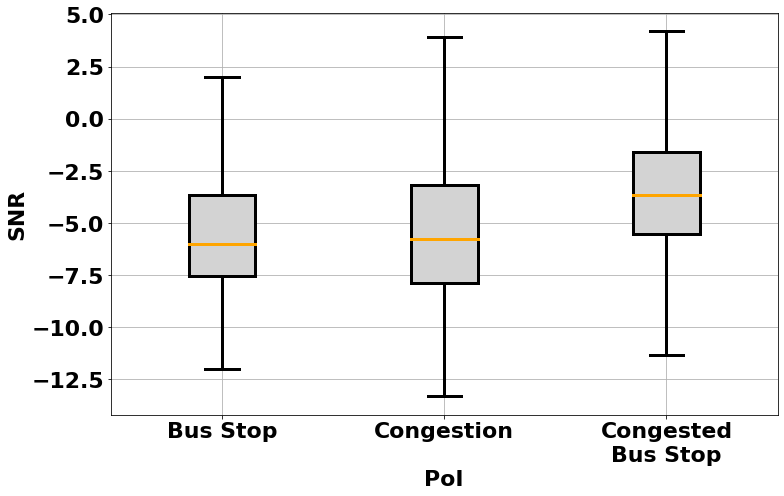

In [3]:
fig, ax = plt.subplots(figsize=(11,7))

pos=[1,2,3]
sep=0.7

bp1=\
ax.boxplot(l,
            positions=pos,
            showfliers=False,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="lightgrey"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )

ax.set_xlabel("PoI",fontsize=22, fontweight='bold')
ax.set_ylabel("SNR",fontsize=22, fontweight='bold')

ax.set_xticks([1,2,3])
ax.set_xticklabels(['Bus Stop','Congestion','Congested\nBus Stop'],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()

In [4]:
fig.savefig('./plots/Sound_Across_PoI_motivation.png')

In [5]:
#NICE